In [1]:
import os

def obtener_ultimo_archivo_creado(directorio):
    archivos = [os.path.join(directorio, f) for f in os.listdir(directorio) 
                if os.path.isfile(os.path.join(directorio, f))]
    
    if not archivos:
        return None
    
    ultimo_archivo = max(archivos, key=os.path.getctime)
    return ultimo_archivo

# Ejemplo de uso:
directorio = "/home/ares/iqoptions_bot/data_csv"
ultimo = obtener_ultimo_archivo_creado(directorio)

if ultimo:
    print("El último archivo creado es:", ultimo)
else:
    print("No se encontraron archivos en la carpeta.")

El último archivo creado es: /home/ares/iqoptions_bot/data_csv/2025-05-01_13-52.csv


In [20]:
import pandas as pd 

df = pd.read_csv(f'{ultimo}')

df.head(2)

,from_dt,to_dt,open,close,min,max,volume,rsi_5,rsi_7,stoch_k,stoch_d,atr_5,price_speed_3,price_speed_5
0,2025-04-28 07:33:00,2025-04-28 07:33:30,1.134745,1.134805,1.134685,1.134850,129,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2025-04-28 07:33:30,2025-04-28 07:34:00,1.134805,1.134845,1.134800,1.134915,96,NaN,NaN,NaN,NaN,0.0,NaN,NaN


# preprocesamiento y seleccion 


In [21]:
# borramos todos los datos faltantes
df = df.dropna()
df.isnull().sum()

from_dt          0
to_dt            0
open             0
close            0
min              0
max              0
volume           0
rsi_5            0
rsi_7            0
stoch_k          0
stoch_d          0
atr_5            0
price_speed_3    0
price_speed_5    0
dtype: int64

In [22]:
# Reinterpretacion de los parametros rsi_5 y rsi_7

df['cat_rsi_5'] = df['rsi_5'].apply(lambda x: 0 if x < 30 else ( 1 if x < 70 else 2))
df['cat_rsi_7'] = df['rsi_7'].apply(lambda x: 0 if x < 30 else ( 1 if x < 70 else 2))


In [23]:
df.columns

Index(['from_dt', 'to_dt', 'open', 'close', 'min', 'max', 'volume', 'rsi_5',
       'rsi_7', 'stoch_k', 'stoch_d', 'atr_5', 'price_speed_3',
       'price_speed_5', 'cat_rsi_5', 'cat_rsi_7'],
      dtype='object')

In [49]:

df[['stoch_k','rsi_5','rsi_7','cat_rsi_5','cat_rsi_7']].head(10)

,stoch_k,rsi_5,rsi_7,cat_rsi_5,cat_rsi_7
6,95.789474,100.000000,100.000000,2,2
7,47.692308,59.296399,65.003915,1,1
8,79.032258,69.986059,72.782666,1,2
9,96.610169,77.134765,78.173261,2,2
10,89.610390,80.600235,80.830873,2,2
11,92.783505,85.430569,84.647408,2,2
12,100.000000,88.631798,87.313575,2,2
13,84.761905,89.398075,87.955743,2,2
14,96.875000,93.469704,91.618510,2,2
15,96.808511,93.791893,91.928116,2,2


In [25]:
df.columns

Index(['from_dt', 'to_dt', 'open', 'close', 'min', 'max', 'volume', 'rsi_5',
       'rsi_7', 'stoch_k', 'stoch_d', 'atr_5', 'price_speed_3',
       'price_speed_5', 'cat_rsi_5', 'cat_rsi_7'],
      dtype='object')

In [64]:
df.atr_5.unique()

array([0.0001468 , 0.00015244, 0.00016295, ..., 0.00014491, 0.00014493,
       0.00013694])

In [ ]:
data = df

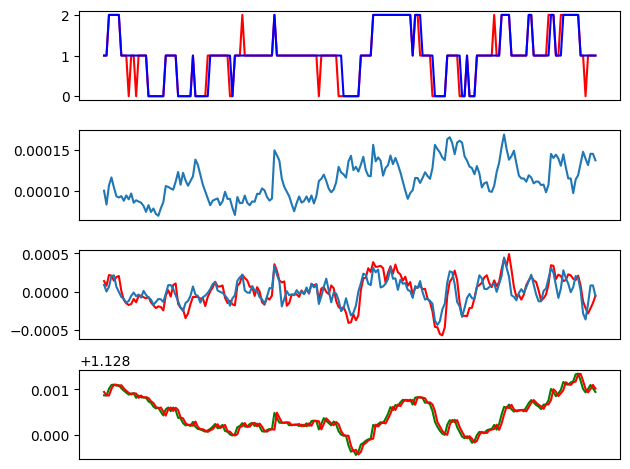

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

rango = 200

x = np.array(df['from_dt'].iloc[-rango:])
y = np.array(df['cat_rsi_5'].iloc[-rango:])
rsi7 = np.array(df['cat_rsi_7'].iloc[-rango:])
y2 = np.array(df['price_speed_5'].iloc[-rango:])
sp3 = np.array(df['price_speed_3'].iloc[-rango:])
y3 = np.array(df['close'].iloc[-rango:])
y4 = np.array(df['open'].iloc[-rango:])
volat = np.array(df['atr_5'].iloc[-rango:])
fig, ax = plt.subplots(4)

# Llama al método plot() en el objeto apropiado
ax[0].plot(x, y, color = 'r')    # Eje 0
ax[0].plot(x, rsi7, color = 'b')
ax[1].plot(x,volat)
ax[2].plot(x, y2, color = 'r')    # Eje 1
ax[2].plot(x, sp3)
ax[3].plot(x, y3, color = 'g')
ax[3].plot(x,y4, color = 'r')

# Ocultar etiquetas del eje X en todos los subplots
for axis in ax:
    axis.set_xticks([])  # Elimina los números del eje X
    # axis.set_xticklabels([])  # Alternativa equivalente

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

[]

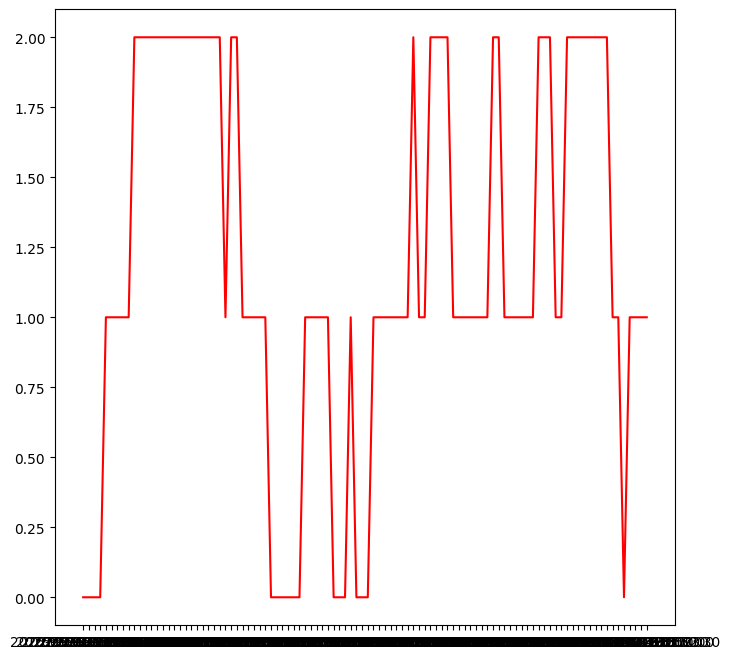

In [46]:


fig = plt.figure(figsize = (8,8))
plt.plot(x, y, color = 'r')
plt.plot()


[]

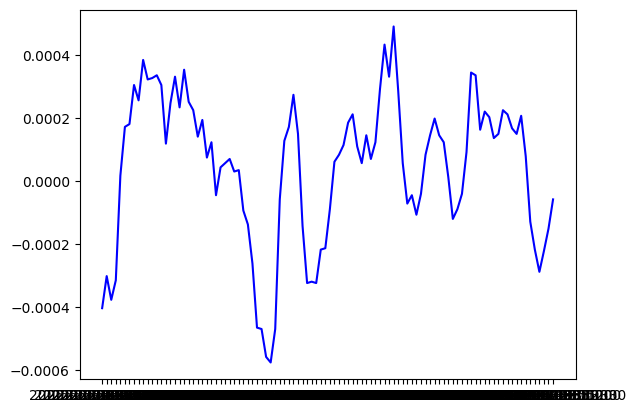

In [47]:

plt.plot(x,y2, color = 'b')
plt.plot()


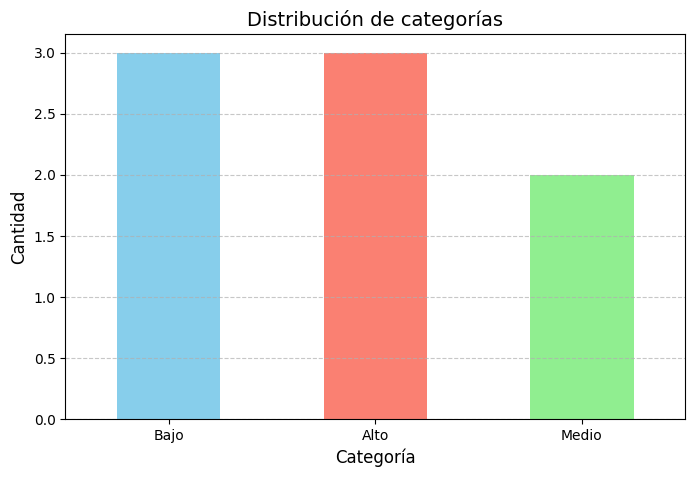

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
df = pd.DataFrame({
    "valor": [30, 70, 120, 45, 150, 80, 200, 25]
})

# Clasificar en categorías
df["categoria"] = df["valor"].apply(
    lambda x: "Bajo" if x < 50 else ("Medio" if x < 100 else "Alto")
)

# Contar valores por categoría
conteo = df["categoria"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
conteo.plot(kind="bar", color=["skyblue", "salmon", "lightgreen"])

# Personalizar el gráfico
plt.title("Distribución de categorías", fontsize=14)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=0)  # Rotación de etiquetas
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Líneas de referencia

# Mostrar el gráfico
plt.show()
